In [272]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv(r'C:\Users\Home\Desktop\Algeria_wildfires_dataset.csv')
print(df.to_string())

       Unnamed: 0        date  longitude   latitude     Province                   Town  night/day  land/water   MaxFRP  fire
0               0  2021-08-08   7.925412  36.195833   Souk Ahras            AIN Djehifa        1.0         2.0      0.0     0
1               1  2021-08-08   7.935738  36.195833   Souk Ahras            AIN Djehifa        1.0         2.0      0.0     0
2               2  2021-08-08        NaN  36.195833   Souk Ahras            AIN Djehifa        1.0         2.0      0.0     0
3               3  2021-08-08        NaN  36.195833   Souk Ahras            AIN Djehifa        1.0         2.0      0.0     0
4               4  2021-08-08        NaN  36.195833   Souk Ahras            AIN Djehifa        1.0         2.0      0.0     0
5               5  2021-08-08        NaN  36.195833   Souk Ahras            AIN Djehifa        1.0         2.0      0.0     0
6               6  2021-08-08        NaN  36.195833   Souk Ahras            AIN Djehifa        1.0         2.0      0.

In [273]:
df.drop(df[df["Province"] == 0].index, inplace=True)

In [274]:
df.info()
df_missing = df.isnull().sum()
print(df_missing)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12525 entries, 0 to 12524
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  12525 non-null  int64  
 1   date        12525 non-null  object 
 2   longitude   12447 non-null  float64
 3   latitude    12499 non-null  float64
 4   Province    12525 non-null  object 
 5   Town        12525 non-null  object 
 6   night/day   12525 non-null  float64
 7   land/water  12525 non-null  float64
 8   MaxFRP      12525 non-null  float64
 9   fire        12525 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 978.6+ KB
Unnamed: 0     0
date           0
longitude     78
latitude      26
Province       0
Town           0
night/day      0
land/water     0
MaxFRP         0
fire           0
dtype: int64


In [275]:
df["longitude"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 12525 entries, 0 to 12524
Series name: longitude
Non-Null Count  Dtype  
--------------  -----  
12447 non-null  float64
dtypes: float64(1)
memory usage: 98.0 KB


In [276]:
df["longitude"].isnull()

0        False
1        False
2         True
3         True
4         True
         ...  
12520    False
12521    False
12522    False
12523    False
12524    False
Name: longitude, Length: 12525, dtype: bool

In [277]:
emptyL=df["longitude"].isnull()
if emptyL.any():
             print(df.loc[emptyL, "longitude"].to_string())

2       NaN
3       NaN
4       NaN
5       NaN
6       NaN
7       NaN
8       NaN
9       NaN
10      NaN
11      NaN
12      NaN
13      NaN
14      NaN
16      NaN
17      NaN
18      NaN
19      NaN
87      NaN
88      NaN
89      NaN
90      NaN
91      NaN
92      NaN
93      NaN
94      NaN
95      NaN
96      NaN
97      NaN
98      NaN
99      NaN
100     NaN
101     NaN
160     NaN
161     NaN
162     NaN
236     NaN
237     NaN
238     NaN
293     NaN
294     NaN
340     NaN
341     NaN
342     NaN
408     NaN
414     NaN
415     NaN
425     NaN
426     NaN
444     NaN
445     NaN
448     NaN
449     NaN
486     NaN
487     NaN
488     NaN
489     NaN
490     NaN
491     NaN
564     NaN
565     NaN
7948    NaN
7949    NaN
7950    NaN
7951    NaN
7952    NaN
7953    NaN
7954    NaN
7955    NaN
7956    NaN
7957    NaN
7958    NaN
12158   NaN
12159   NaN
12160   NaN
12161   NaN
12162   NaN
12163   NaN
12164   NaN


In [278]:
# Pour remplir les cases vides ci-dessus on applique la statistique Mean(La moyenne mais on divise notre data set par rapport a les villes
C1=df[["longitude","Province"]]
print(C1.to_string())

       longitude     Province
0       7.925412   Souk Ahras
1       7.935738   Souk Ahras
2            NaN   Souk Ahras
3            NaN   Souk Ahras
4            NaN   Souk Ahras
5            NaN   Souk Ahras
6            NaN   Souk Ahras
7            NaN   Souk Ahras
8            NaN   Souk Ahras
9            NaN   Souk Ahras
10           NaN   Souk Ahras
11           NaN   Souk Ahras
12           NaN   Souk Ahras
13           NaN   Souk Ahras
14           NaN   Souk Ahras
15      7.954698   Souk Ahras
16           NaN   Souk Ahras
17           NaN   Souk Ahras
18           NaN   Souk Ahras
19           NaN   Souk Ahras
20      7.943529   Souk Ahras
21      7.953852   Souk Ahras
22      7.964175   Souk Ahras
23      7.974498   Souk Ahras
24      7.984821   Souk Ahras
25      7.925412   Souk Ahras
26      7.935738   Souk Ahras
27      7.946065   Souk Ahras
28      7.956391   Souk Ahras
29      7.966717   Souk Ahras
30      7.977043   Souk Ahras
31      7.987370   Souk Ahras
32      7.

In [279]:
souk_ahras_long = df[df["Province"] == "Souk Ahras"]["longitude"].mean()
df.loc[df["Province"] == "Souk Ahras", "longitude"].fillna(souk_ahras_long, inplace=True)
print(df[df["Province"] == "Souk Ahras"]["longitude"])

0      7.925412
1      7.935738
2           NaN
3           NaN
4           NaN
         ...   
131    7.972661
132    7.982995
133    7.961478
134    7.971811
135    7.982144
Name: longitude, Length: 136, dtype: float64


In [280]:
blida_long = df[df["Province"] == "Blida"].groupby("Province")["longitude"].mean()
print(blida_long)

Province
Blida    3.296488
Name: longitude, dtype: float64


In [281]:
blida_long = df[df["Province"] == "Blida"]["longitude"].mean()
blida_long = df[df["Province"] == "Blida"]["longitude"].mean()
df.loc[df["Province"] == "Blida", "longitude"].fillna(blida_long)
print(df[df["Province"] == "Blida"]["longitude"])

137    3.261552
138    3.271923
139    3.282294
140    3.292664
141    3.303035
         ...   
388    3.290185
389    3.300547
390    3.310910
391    3.321273
392    3.331636
Name: longitude, Length: 256, dtype: float64


In [282]:
bejaia_long = df[df["Province"] == "Bejaia"]["longitude"].mean()
df.loc[df["Province"] == "Bejaia", "longitude"].fillna(bejaia_long)
print(df[df["Province"] == "Bejaia"]["longitude"])

393      4.584600
394      4.595008
395      4.605415
396      4.615823
397      4.626231
           ...   
10640    5.252141
10641    5.262510
10642    5.272880
10643    5.283249
10644    5.293619
Name: longitude, Length: 3796, dtype: float64


In [283]:
bouira_long = df[df["Province"] == "Bouira"]["longitude"].mean()
df.loc[df["Province"] == "Bouira", "longitude"].fillna(bouira_long)
print(df[df["Province"] == "Bouira"]["longitude"])

7613    3.500831
7614    3.511203
7615    3.521576
7616    3.531949
7617    3.542322
          ...   
8536    3.763638
8537    3.773992
8538    3.784346
8539    3.794700
8540    3.805054
Name: longitude, Length: 928, dtype: float64


In [284]:
boumerdas_long = df[df["Province"] == "Boumerdes"]["longitude"].mean()
df.loc[df["Province"] == "Boumerdes", "longitude"].fillna(boumerdas_long)
print(df[df["Province"] == "Boumerdes"]["longitude"])

7577     3.787850
7578     3.798242
7579     3.808634
7580     3.787440
7581     3.797831
           ...   
12520    3.838562
12521    3.848951
12522    3.859340
12523    3.869728
12524    3.880117
Name: longitude, Length: 596, dtype: float64


In [285]:
print(df[["longitude","Province"]])

       longitude    Province
0       7.925412  Souk Ahras
1       7.935738  Souk Ahras
2            NaN  Souk Ahras
3            NaN  Souk Ahras
4            NaN  Souk Ahras
...          ...         ...
12520   3.838562   Boumerdes
12521   3.848951   Boumerdes
12522   3.859340   Boumerdes
12523   3.869728   Boumerdes
12524   3.880117   Boumerdes

[12525 rows x 2 columns]


In [286]:
print(df["longitude"].isnull().sum())

78


In [287]:
print(df["latitude"].isnull().sum())

26


In [288]:
emptyT=df["latitude"].isnull()
if emptyT.any():
             print(df.loc[emptyT, "latitude"].to_string())

79      NaN
80      NaN
81      NaN
82      NaN
83      NaN
84      NaN
85      NaN
86      NaN
87      NaN
88      NaN
89      NaN
90      NaN
5280    NaN
5281    NaN
5282    NaN
11448   NaN
11449   NaN
11450   NaN
11451   NaN
11452   NaN
11453   NaN
11454   NaN
11455   NaN
11456   NaN
11457   NaN
11458   NaN


In [289]:
index = 5280
end_index = 11458

while index < end_index:
    print(df.loc[index, "Province"])
    index += 1


Tizi Ouzou
Tizi Ouzou
Tizi Ouzou
Tizi Ouzou
Tizi Ouzou
Tizi Ouzou
Tizi Ouzou
Tizi Ouzou
Tizi Ouzou
Tizi Ouzou
Tizi Ouzou
Tizi Ouzou
Tizi Ouzou
Tizi Ouzou
Tizi Ouzou
Tizi Ouzou
Tizi Ouzou
Tizi Ouzou
Tizi Ouzou
Tizi Ouzou
Tizi Ouzou
Tizi Ouzou
Tizi Ouzou
Tizi Ouzou
Tizi Ouzou
Tizi Ouzou
Tizi Ouzou
Tizi Ouzou
Tizi Ouzou
Tizi Ouzou
Tizi Ouzou
Tizi Ouzou
Tizi Ouzou
Tizi Ouzou
Tizi Ouzou
Tizi Ouzou
Tizi Ouzou
Tizi Ouzou
Tizi Ouzou
Tizi Ouzou
Tizi Ouzou
Tizi Ouzou
Tizi Ouzou
Tizi Ouzou
Tizi Ouzou
Tizi Ouzou
Tizi Ouzou
Tizi Ouzou
Tizi Ouzou
Tizi Ouzou
Tizi Ouzou
Tizi Ouzou
Tizi Ouzou
Tizi Ouzou
Tizi Ouzou
Tizi Ouzou
Tizi Ouzou
Tizi Ouzou
Tizi Ouzou
Tizi Ouzou
Tizi Ouzou
Tizi Ouzou
Tizi Ouzou
Tizi Ouzou
Tizi Ouzou
Tizi Ouzou
Tizi Ouzou
Tizi Ouzou
Tizi Ouzou
Tizi Ouzou
Tizi Ouzou
Tizi Ouzou
Tizi Ouzou
Tizi Ouzou
Tizi Ouzou
Tizi Ouzou
Tizi Ouzou
Tizi Ouzou
Tizi Ouzou
Tizi Ouzou
Tizi Ouzou
Tizi Ouzou
Tizi Ouzou
Tizi Ouzou
Tizi Ouzou
Tizi Ouzou
Tizi Ouzou
Tizi Ouzou
Tizi Ouzou
Tizi Ouzou
Tizi Ouzou

In [290]:
souk_ahras_latt = df[df["Province"] == "Souk Ahras"]["latitude"].mean()
df.loc[df["Province"] == "Souk Ahras", "latitude"].fillna(souk_ahras_latt)
print(df[df["Province"] == "Souk Ahras"]["latitude"])

0      36.195833
1      36.195833
2      36.195833
3      36.195833
4      36.195833
         ...    
131    36.254167
132    36.254167
133    36.245833
134    36.245833
135    36.245833
Name: latitude, Length: 136, dtype: float64


In [291]:
bejaia_latt = df[df["Province"] == "Bejaia"]["latitude"].mean()
df.loc[df["Province"] == "Bejaia", "latitude"].fillna(bejaia_latt)
print(df[df["Province"] == "Bejaia"]["latitude"])

393      36.804167
394      36.804167
395      36.804167
396      36.804167
397      36.804167
           ...    
10640    36.520833
10641    36.520833
10642    36.520833
10643    36.520833
10644    36.520833
Name: latitude, Length: 3796, dtype: float64


In [292]:
skikda_latt = df[df["Province"] == "Skikda"]["latitude"].mean()
df.loc[df["Province"] == "Skikda", "latitude"].fillna(skikda_latt)
print(df[df["Province"] == "Skikda"]["latitude"])

3915     36.995833
3916     36.995833
3917     36.995833
3918     36.995833
3919     36.987500
           ...    
11960    36.862500
11961    36.862500
11962    36.862500
11963    36.862500
11964    36.862500
Name: latitude, Length: 920, dtype: float64


In [293]:
bouira_latt = df[df["Province"] == "Bouira"]["latitude"].mean()
df.loc[df["Province"] == "Bouira", "latitude"].fillna(bouira_latt)
print(df[df["Province"] == "Bouira"]["latitude"])

7613    36.545833
7614    36.545833
7615    36.545833
7616    36.545833
7617    36.545833
          ...    
8536    36.404167
8537    36.404167
8538    36.404167
8539    36.404167
8540    36.404167
Name: latitude, Length: 928, dtype: float64


In [294]:
jijel_latt = df[df["Province"] == "Jijel"]["latitude"].mean()
df.loc[df["Province"] == "Jijel", "latitude"].fillna(jijel_latt)
print(df[df["Province"] == "Jijel"]["latitude"])

3671     36.679167
3672     36.679167
3673     36.670833
3674     36.670833
3675     36.679167
           ...    
11316    36.679167
11317    36.687500
11318    36.687500
11319    36.679167
11320    36.679167
Name: latitude, Length: 856, dtype: float64


In [295]:
tizi_ouzou_latt = df[df["Province"] == "Tizi Ouzou"]["latitude"].mean()
df.loc[df["Province"] == "Tizi Ouzou", "latitude"].fillna(tizi_ouzou_latt)
print(df[df["Province"] == "Tizi Ouzou"]["latitude"])


4191     36.6625
4192     36.6625
4193     36.6625
4194     36.6625
4195     36.6625
          ...   
10704    36.8875
10705    36.8875
10706    36.8875
10707    36.8875
10708    36.8875
Name: latitude, Length: 3276, dtype: float64


In [296]:
df["latitude"].isnull().sum()

26

In [297]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12525 entries, 0 to 12524
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  12525 non-null  int64  
 1   date        12525 non-null  object 
 2   longitude   12447 non-null  float64
 3   latitude    12499 non-null  float64
 4   Province    12525 non-null  object 
 5   Town        12525 non-null  object 
 6   night/day   12525 non-null  float64
 7   land/water  12525 non-null  float64
 8   MaxFRP      12525 non-null  float64
 9   fire        12525 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 978.6+ KB


In [298]:
province_means = df.groupby("Province")["longitude"].transform("mean")
df["longitude"].fillna(province_means, inplace=True)
print(df["longitude"])



province_means = df.groupby("Province")["latitude"].transform("mean")
df["latitude"].fillna(province_means, inplace=True)
print(df["latitude"])


0        7.925412
1        7.935738
2        7.962815
3        7.962815
4        7.962815
           ...   
12520    3.838562
12521    3.848951
12522    3.859340
12523    3.869728
12524    3.880117
Name: longitude, Length: 12525, dtype: float64
0        36.195833
1        36.195833
2        36.195833
3        36.195833
4        36.195833
           ...    
12520    36.662500
12521    36.662500
12522    36.662500
12523    36.662500
12524    36.662500
Name: latitude, Length: 12525, dtype: float64


In [299]:
print(df["latitude"].isnull().sum())

0


In [300]:
print(df["longitude"].isnull().sum())

0


In [301]:
#Si toutes les colomnes ont 12525 valeurs donc il y a plus de valeurs manquantes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12525 entries, 0 to 12524
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  12525 non-null  int64  
 1   date        12525 non-null  object 
 2   longitude   12525 non-null  float64
 3   latitude    12525 non-null  float64
 4   Province    12525 non-null  object 
 5   Town        12525 non-null  object 
 6   night/day   12525 non-null  float64
 7   land/water  12525 non-null  float64
 8   MaxFRP      12525 non-null  float64
 9   fire        12525 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 978.6+ KB


In [302]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12525 entries, 0 to 12524
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  12525 non-null  int64  
 1   date        12525 non-null  object 
 2   longitude   12525 non-null  float64
 3   latitude    12525 non-null  float64
 4   Province    12525 non-null  object 
 5   Town        12525 non-null  object 
 6   night/day   12525 non-null  float64
 7   land/water  12525 non-null  float64
 8   MaxFRP      12525 non-null  float64
 9   fire        12525 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 978.6+ KB


In [303]:
df["date"]=pd.to_datetime(df["date"])
df["night/day"] = df["night/day"].astype('object')
df["land/water"] = df["land/water"].astype('object')

In [304]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12525 entries, 0 to 12524
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  12525 non-null  int64         
 1   date        12525 non-null  datetime64[ns]
 2   longitude   12525 non-null  float64       
 3   latitude    12525 non-null  float64       
 4   Province    12525 non-null  object        
 5   Town        12525 non-null  object        
 6   night/day   12525 non-null  object        
 7   land/water  12525 non-null  object        
 8   MaxFRP      12525 non-null  float64       
 9   fire        12525 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(4)
memory usage: 978.6+ KB


In [305]:
if (df["night/day"] == 1).any():
    df.loc[df["night/day"] == 1, "night/day"] = "night"
if (df["night/day"] == 0).any():
    df.loc[df["night/day"] == 0, "night/day"] = "day"

In [306]:
print(df["night/day"].to_string())

0        night
1        night
2        night
3        night
4        night
5        night
6        night
7        night
8        night
9        night
10       night
11       night
12       night
13       night
14       night
15       night
16       night
17       night
18       night
19       night
20       night
21       night
22       night
23       night
24       night
25       night
26       night
27       night
28       night
29       night
30       night
31       night
32       night
33       night
34       night
35       night
36       night
37       night
38       night
39       night
40       night
41       night
42       night
43       night
44       night
45       night
46       night
47       night
48       night
49       night
50       night
51       night
52       night
53       night
54       night
55       night
56       night
57       night
58       night
59       night
60       night
61       night
62       night
63       night
64       night
65       night
66       n

In [307]:
#On supprime la premiere columne qui repete le nombre de ligne:
df.drop(df.columns[0], axis=1, inplace=True)
df.drop("land/water",axis='columns', inplace=True)

In [308]:
print(df.duplicated())

0        False
1        False
2        False
3         True
4         True
         ...  
12520    False
12521    False
12522    False
12523    False
12524    False
Length: 12525, dtype: bool


In [309]:
df.drop_duplicates(inplace = True)

In [310]:
print(df.duplicated())

0        False
1        False
2        False
7        False
13       False
         ...  
12520    False
12521    False
12522    False
12523    False
12524    False
Length: 12482, dtype: bool


In [311]:
print(df.duplicated().sum())

0


In [312]:
print(df.head())

         date  longitude   latitude    Province         Town night/day  \
0  2021-08-08   7.925412  36.195833  Souk Ahras  AIN Djehifa     night   
1  2021-08-08   7.935738  36.195833  Souk Ahras  AIN Djehifa     night   
2  2021-08-08   7.962815  36.195833  Souk Ahras  AIN Djehifa     night   
7  2021-08-08   7.962815  36.187500  Souk Ahras  AIN Djehifa     night   
13 2021-08-08   7.962815  36.179167  Souk Ahras  AIN Djehifa     night   

    MaxFRP  fire  
0      0.0     0  
1      0.0     0  
2      0.0     0  
7      0.0     0  
13     0.0     0  


In [313]:
df.dtypes

date         datetime64[ns]
longitude           float64
latitude            float64
Province             object
Town                 object
night/day            object
MaxFRP              float64
fire                  int64
dtype: object

In [314]:
def get_var_category(series):
    unique_count = series.nunique(dropna=False)
    total_count = len(series)
    if pd.api.types.is_numeric_dtype(series):
        return 'Numerical'
    elif pd.api.types.is_datetime64_dtype(series):
        return 'Date'
    elif unique_count==total_count:
        return 'Text (Unique)'
    else:
        return 'Categorical'

def print_categories(df):
    for column_name in df.columns:
        print(column_name, ": ", get_var_category(df[column_name]))

In [315]:
print_categories(df)

date :  Date
longitude :  Numerical
latitude :  Numerical
Province :  Categorical
Town :  Categorical
night/day :  Categorical
MaxFRP :  Numerical
fire :  Numerical


In [316]:
df.head(4)

,date,longitude,latitude,Province,Town,night/day,MaxFRP,fire
0,2021-08-08,7.925412,36.195833,Souk Ahras,AIN Djehifa,night,0.0,0
1,2021-08-08,7.935738,36.195833,Souk Ahras,AIN Djehifa,night,0.0,0
2,2021-08-08,7.962815,36.195833,Souk Ahras,AIN Djehifa,night,0.0,0
7,2021-08-08,7.962815,36.187500,Souk Ahras,AIN Djehifa,night,0.0,0


In [317]:
Datef=df.set_index("date")
Datef.head()

,longitude,latitude,Province,Town,night/day,MaxFRP,fire
date,,,,,,,
2021-08-08,7.925412,36.195833,Souk Ahras,AIN Djehifa,night,0.0,0
2021-08-08,7.935738,36.195833,Souk Ahras,AIN Djehifa,night,0.0,0
2021-08-08,7.962815,36.195833,Souk Ahras,AIN Djehifa,night,0.0,0
2021-08-08,7.962815,36.187500,Souk Ahras,AIN Djehifa,night,0.0,0
2021-08-08,7.962815,36.179167,Souk Ahras,AIN Djehifa,night,0.0,0


In [318]:
P_date=Datef["fire"]
print(P_date)

date
2021-08-08    0
2021-08-08    0
2021-08-08    0
2021-08-08    0
2021-08-08    0
             ..
2023-07-25    0
2023-07-25    0
2023-07-25    0
2023-07-25    0
2023-07-25    0
Name: fire, Length: 12482, dtype: int64


In [319]:
x=Datef[["fire"]]
x.count()

fire    12482
dtype: int64

In [320]:
Province_fire = df[df["fire"] == 1].copy()
Province_fire.drop(Province_fire.loc[Province_fire["Province"] == "0"].index, inplace=True)

In [321]:
Province_fire.count()

date         1791
longitude    1791
latitude     1791
Province     1791
Town         1791
night/day    1791
MaxFRP       1791
fire         1791
dtype: int64

In [322]:
Province_fire["Province"].max()

'Tizi Ouzou'

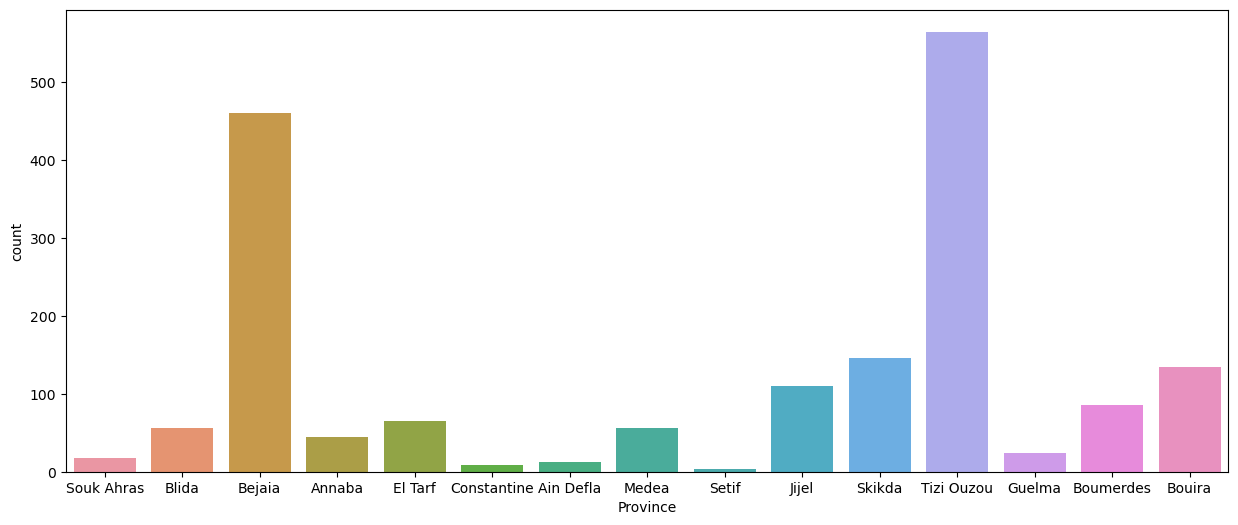

In [323]:
plt.figure(figsize=(15, 6))
sns.countplot(x = Province_fire["Province"],data =Province_fire)
plt.show()

datetime64[ns]


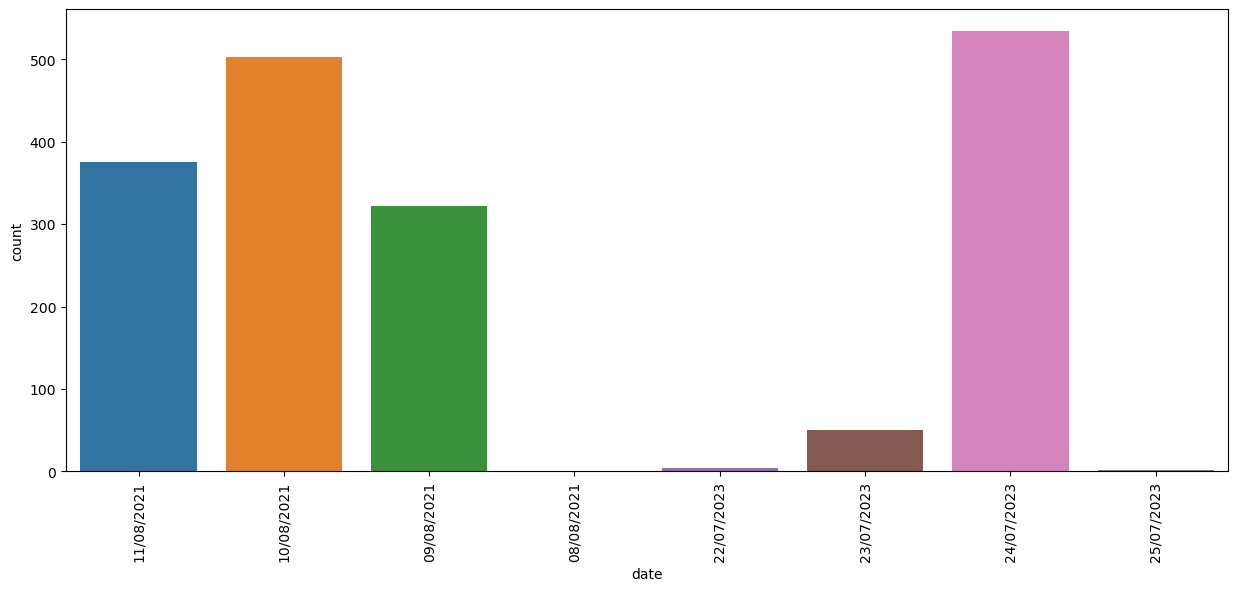

In [324]:
# Assurez-vous que le type de données de la colonne "date" est correct
print(Province_fire["date"].dtype)

# Convertir la colonne "date" en format de date approprié
Province_fire["date"] = pd.to_datetime(Province_fire["date"])

# Convertir la colonne "date" en format "jour/mois/année"
Province_fire["date"] = Province_fire["date"].dt.strftime("%d/%m/%Y")
# Créer un graphique pour visualiser le nombre d'incendies par date
plt.figure(figsize=(15, 6))
sns.countplot(x=Province_fire["date"], data=Province_fire)
plt.xticks(rotation=90)  # Rotation des étiquettes de l'axe x pour une meilleure lisibilité
plt.show()
